In [1]:
import sys
import os
import glob 
import re
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas


# Jupyter specific autoreloading for external functions (in case changes are made)
%load_ext autoreload
%autoreload
# %matplotlib widget

# Mac or Windows
#---------------------------------------------------------------------------
Fmac= '/Users/dominicburrows'
Fwin = 'C:/Users/Dominic'
Fdrop = Fmac + '/' + 'Dropbox/PhD/suite2p data/dom_data'


file = os.path.dirname(Fmac + '/' + 'Dropbox/PhD/suite2p data/Scripts/extract_functions.py')
sys.path.append(file)

import extract_functions as fn


In [111]:
# Define computer and data location
#---------------------------------------------------------------------------
Fs2p = Fmac + '/' + 'Documents/Imaging' + '/' + '190409_wtp_gc6s_15%/F1_bln_suite2p'
Fdrop = Fmac + '/' + 'Dropbox/PhD/suite2p data/dom_data' 


#Extract all active cells from suite2p plane data
#--------------------------------------------------------------------
Fish  = fn.fish_load(Fs2p, Fdrop, p)

Found 10 planes
Found 13550 cells
Saved trace and coordinates in dom_data


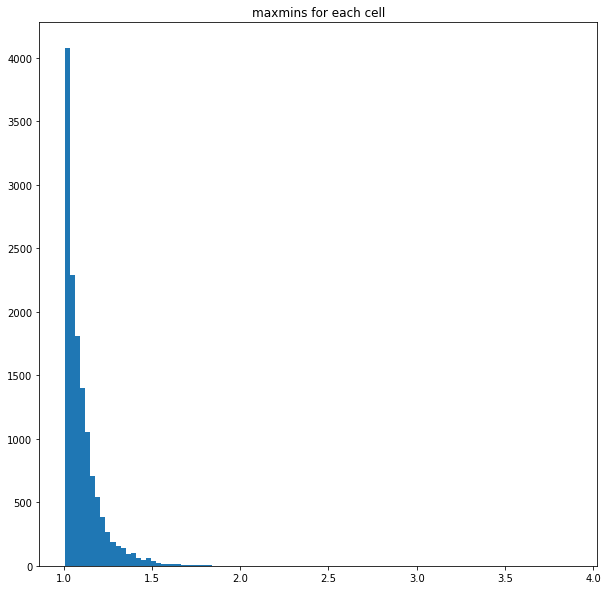

In [112]:
# Define trace and coord file location
#---------------------------------------------------------------------------
inp = '190409_wtp_F1_bln'
Ftrace = Fdrop + '/' + inp + '_com_signal.npy'
Fcoord = Fdrop + '/' + inp + '_com_coord.npy'
Fish = {'Trace':np.load(Ftrace), 'Coord': np.load(Fcoord)}

# Apply filter: band pass and linear/highpass
#---------------------------------------------------------------------------
ffilt = fn.fish_filter(Fish['Trace'], highcut = 500, lowcut = 0)
Fish.update({'Filt':ffilt})

dat = Fish['Filt']

def fish_norm(dat):   
    return(dat/np.mean(dat))
norm = np.apply_along_axis(fish_norm, 1, (dat + 3000))


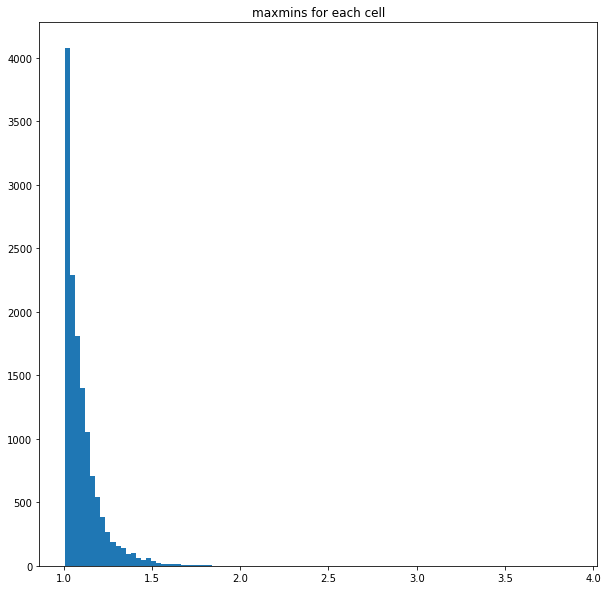

In [186]:
window = 9
# Define size of iding window in frames to calculate max of mins
#---------------------------------------------------------------------------
fmxmn = fn.fish_max_min(norm, window)
Fish.update({'Maxmin':fmxmn})
# View histogram of all maxmins for each cell
#---------------------------------------------------------------------------
plt.figure(figsize=(10,10))
plt.hist(Fish['Maxmin'], bins=100, range=(min(Fish['Maxmin']),max(Fish['Maxmin'])), rwidth = 10)
plt.title('maxmins for each cell')
plt.show()


Kept 4897 cells
Filtered 8653 cells


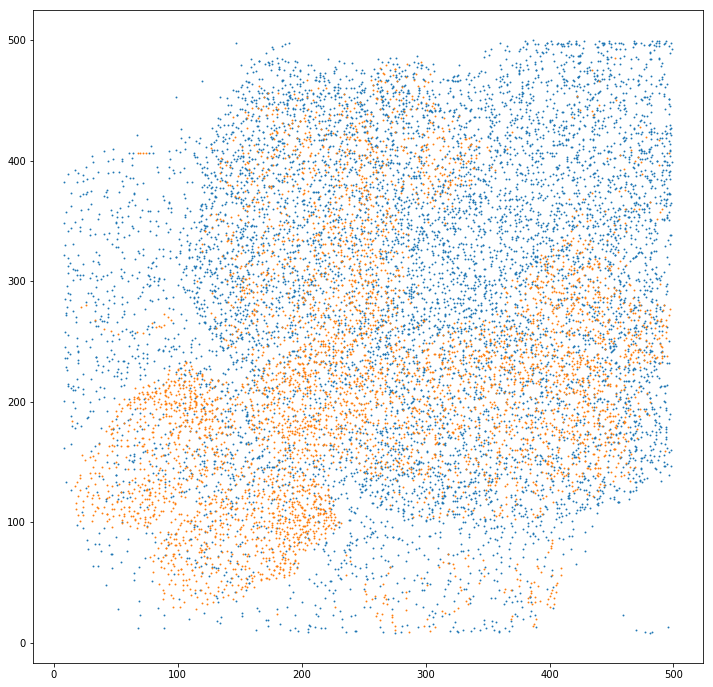

In [198]:
# Set threshold and remove non-firing cells
#--------------------------------------------------------------------------------------------------
thresh = 1.1

ffin = fn.fish_thresh(Fish['Trace'], Fish['Coord'], Fish['Maxmin'], Ftrace, Fdrop, thresh)
Fish.update({'Realcell': ffin[1], 'Realtrace': ffin[0], 'Noisecell': ffin[3], 'Noisetrace': ffin[2]})
# Plot kept and excluded cells - adjust threshold
#---------------------------------------------------------------------------
plt.figure(figsize= (12,12))
plt.scatter(Fish['Noisecell'][:,0], Fish['Noisecell'][:,1], s=0.8)
plt.scatter(Fish['Realcell'][:,0], Fish['Realcell'][:,1], s=0.8)
plt.show()

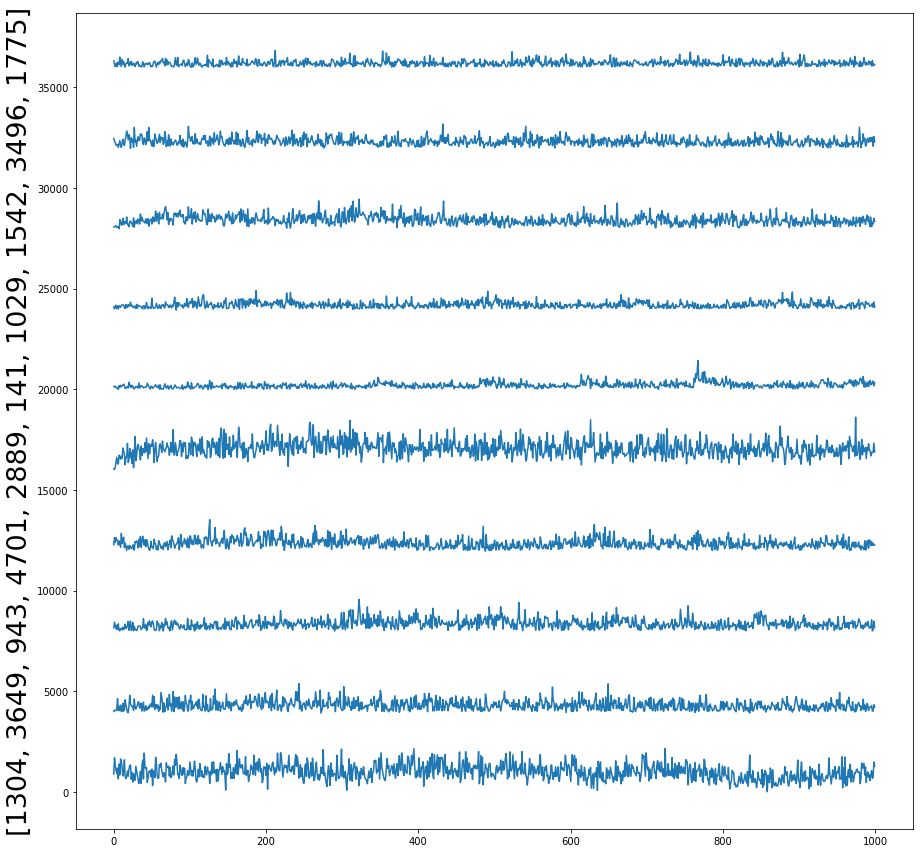

In [241]:
# Plot raw excluded cell traces - adjust threshold
#---------------------------------------------------------------------------
import random as rand
x = Fish['Realtrace'] 
y = Fish['Noisetrace']
choose =  x

nplt  = 10
rdm = rand.sample(range(0, choose.shape [0]), nplt)

f = choose[rdm]
cm    = plt.get_cmap("Paired")
fig, ax = plt.subplots(figsize=(15,15))
ax.set_ylabel(rdm, size=27)
for i in range(nplt):
    plt.plot(f[i,:1000] + 4000*i, c=cm(1))

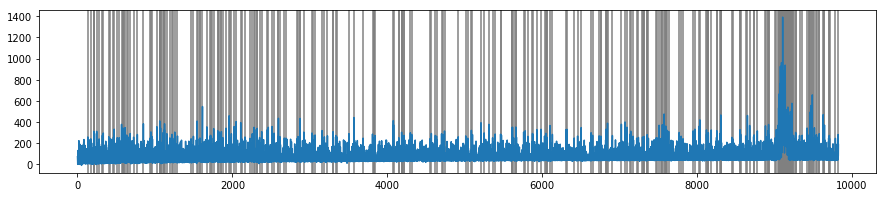

In [234]:
#Binarise trace - decide type and cutoff
#stdlim = how many stds from norm as cutoff, cnt is percentile of data to define peak from 
#cell = choose which cell to plot, typ = 'peaks' for python peak calculation, 'std' for standard deviation from norm
#--------------------------------------------------------------------------------------------------------------------
fbin = fn.fish_bin(x, Fish['Realcell'], Ftrace, Fdrop, stdlim = 3, cnt = 80, typ = 'std', cell = 942, save = 'no')

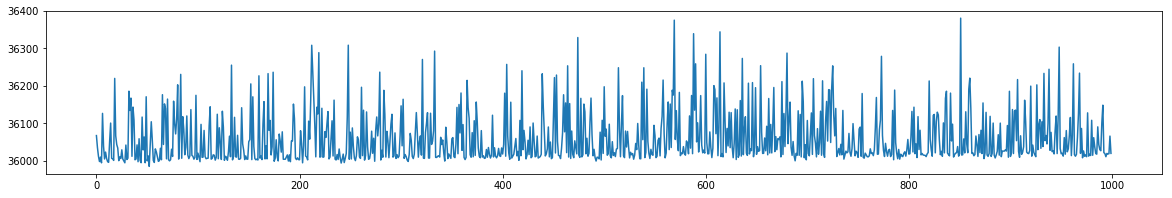

In [249]:
fig, ax = plt.subplots(figsize=(20,3))
plt.plot(x[942,:1000] + 4000*i, c=cm(1))

In [49]:
grouptifs = 49
for i in range(grouptifs):
    if grouptifs > 9:
        s = Image.open(tiflocation + 'plane0/' + 'file_chan0' + str(grouptifs) + '.tif')

    else:
        s = Image.open(tiflocation + 'plane0/' + 'file_chan00' + str(grouptifs) + '.tif')




In [28]:
from PIL import Image, ImageSequence

im = Image.open(tiflocation + 'plane0/' + 'file_chan001.tif')

for i, page in enumerate(ImageSequence.Iterator(im)):
    page.save("page%d.png" % i)
    

In [ ]:
for i in range(200):
    im.seek(i)
    im.save(om)

In [86]:
# Select fish to visualise
#------------------------------------
import os
global region_images
global tiff_dimensions
from PIL import Image 
import matplotlib.pyplot as plt

fish = 'F1_bln/'
date = '190409_wtp_gc6s_15%/'
tifpath = '/Volumes/Dominic Time Machine/' + date + fish
savepath = Fmac + '/' + 'Documents/Imaging/' + 'bin'
plane = 4
os.chdir(tifpath + 'plane' + str(plane))
n_tiffs = len(sorted(glob.glob("*.tif")))


In [90]:
tifpath

'/Volumes/Dominic Time Machine/190409_wtp_gc6s_15%/F1_bln/'

In [83]:
# Save reg_tif in bin to visualise for widget
#------------------------------------------------
counter = 0
def 

for t in range(n_tiffs):

    if t < 9:
        im = Image.open(tifpath + 'plane' + str(plane) + '/' + 'file_chan00' + str(t) + '.tif')
        for i, page in enumerate(ImageSequence.Iterator(im)):
            page.save(savepath + '/seeme' + str(counter) + '.tif',"TIFF")
            counter += 1
        
    if t >9: 
        im = Image.open(tifpath + 'plane' + str(plane) + '/' + 'file_chan0' + str(t) + '.tif')
        for i, page in enumerate(ImageSequence.Iterator(im)):
            page.save(savepath + '/seeme' + str(counter) + '.tif',"TIFF")
            counter += 1
    
    if t%10 == 0: 
        print(str(t) + ' of ' + str(n_tiffs) + ' metatiffs saved')

0 of 50 metatiffs saved
10 of 50 metatiffs saved
20 of 50 metatiffs saved
30 of 50 metatiffs saved
40 of 50 metatiffs saved


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Dominic Time Machine/190409_wtp_gc6s_15%/F1_bln/plane4/file_chan050.tif'

In [99]:
practice = io.imread(tifpath + '/plane5' + '/file_chan000.tif')##########

In [ ]:
for i in range(im.n_frames):
    im.seek(i)
    plt.matshow(im)

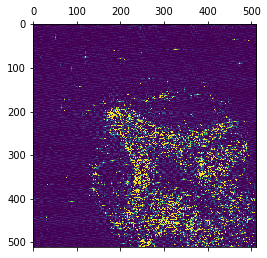

In [311]:
x = plt.imread(tiflocation + 'plane0/' + 'file_chan000.tif')
plt.matshow(x[:,:,2])

In [ ]:
import sys
from PyQt5.QtCore import*
from PyQt5.QtGui import*
from PyQt5.QtWidgets import*
from PIL import Image, ImageSequence

class Window(QWidget):

    def __init__(self, parent=None):
        super(Window, self).__init__(parent)
        self.setWindowTitle("To cell or not to cell")
        self.setGeometry(100,100,1500,700)

        self.create_main_layout()

        
    def create_main_layout(self):
        self.layout = QGridLayout()
        self.setLayout(self.layout)
        self.cellcombobox = QComboBox()
        #self.slider = QSlider(Qt.horizontal)
        self.button = QPushButton('pushme')
        self.layout.addWidget(self.slider, 1,1)
        self.layout.addWidget(self.button, 5,3)
        self.layout.addWidget(self.cellcombobox, 5,4)
        
    #tempalte to make window

app = QApplication(sys.argv)


thing = Window()
thing.show()
        
#sys.exit(app.exec_())
#tiffdisplayfigure = Figure()
#tiffdisplaycanvas = FigureCanvas(tiffdisplayfigure)



#make function

#tiffdisplayfigure.clear()
#axis = figure.add_subplot(111)
#axis.imshow(practice[0], cmap = 'grey')
#plt.show()
#tiffdisplaycanvas.draw()
#tiffdisplaycanvas.update()    

In [ ]:
%tb

In [85]:
app = QApplication(sys.argv)
practice = Window()
practice.show()
sys.exit(app.exec_())

SystemExit: 0

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
from PyQt4.QtCore import *
from PyQt4.QtGui import *
import sys
import numpy as np
import random
import networkx as nx
import community
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.figure import Figure
from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt4agg import NavigationToolbar2QT as NavigationToolbar
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.widgets import LassoSelector
import numpy as np
from skimage.data import coins
from os import listdir
from scipy import stats

sys.path.append(r"C:\Users\matth\OneDrive\Documents\Python Code\Matts Modules")
import matts_admin_functions
import matts_network_functions
import matts_matrix_functions

fish_name = r"\\190401_wt_tectum"
coordinates_file_location       = r"F:\\Zebrafish 2 Photon\\Traces"
activity_file_location          = r"F:\\Zebrafish 2 Photon\\Binary Matricies"

global neuron_coordinates
global activity_matrix
global number_of_neurons
global number_of_timepoints
global roi_elipses
global total_activities


class Window(QDialog):

    def __init__(self, parent=None):
        super(Window, self).__init__(parent)
        self.setWindowTitle("Activity Visualiser")
        self.setGeometry(100,100,1500,700)

        self.create_main_layout()

    def create_main_layout(self):
        self.layout = QGridLayout()
        self.setLayout(self.layout)

        self.graphics_view = QGraphicsView()
        self.graphics_view.setMaximumWidth(800)
        self.graphics_view.setMaximumHeight(800)

        self.layout.addWidget(self.graphics_view,   00, 00, 01, 01)


def load_data():
    global activity_matrix
    global neuron_coordinates
    global number_of_neurons
    global number_of_timepoints

    neuron_coordinates  = np.genfromtxt(coordinates_file_location + fish_name + "_traces.csv",  delimiter=",",  dtype="int")
    activity_matrix     = np.genfromtxt(activity_file_location + fish_name + "_binary_matrix.csv",     delimiter=",",  dtype="int")
    activity_matrix = np.delete(activity_matrix, (0), axis=0)


    number_of_neurons, number_of_timepoints = np.shape(activity_matrix)
    print "Number of neurons: ", number_of_neurons
    print "Number if timepoints: ", number_of_timepoints

    print "shape coords: ", np.shape(neuron_coordinates)


def get_total_activity():
    global total_activities
    total_activities = []

    for neuron in range(number_of_neurons):
        total_activities.append(np.sum(activity_matrix[neuron]))

    max_activity = np.max(total_activities)

    for neuron in range(number_of_neurons):
        total_activities[neuron] = float(total_activities[neuron])/max_activity


def draw_base_scene():
    global roi_elipses
    scene = QGraphicsScene(0,0,800,800)
    roi_size = 10
    roi_elipses = matts_admin_functions.create_empty_list(number_of_neurons)


    scale_factor = 2
    y_offset = 20
    x_offset = 20

    for roi_index in range(number_of_neurons):
        x_cord = neuron_coordinates[roi_index][0]
        y_cord = neuron_coordinates[roi_index][1]

        colour = get_colour(0,"plasma",0.8)

        roi_elipses[roi_index] = QGraphicsEllipseItem(0, 0, roi_size, roi_size)
        roi_elipses[roi_index].setPos(int(x_cord * scale_factor) + x_offset, int(y_cord * scale_factor) + y_offset)
        roi_elipses[roi_index].setBrush(QBrush(colour))
        roi_elipses[roi_index].setOpacity(0.2)

        scene.addItem(roi_elipses[roi_index])

    #scene.setSceneRect(0, 0, 100, 100)
    main.graphics_view.setScene(scene)


def get_colour(input_value,colour_map,scale_factor):
    input_value = input_value * scale_factor
    cmap = cm.get_cmap(colour_map)
    float_tuple = cmap(input_value)
    matplot_to_q_colour_conversion_factor = 255
    colour = QColor(float_tuple[0]*matplot_to_q_colour_conversion_factor,
                          float_tuple[1]*matplot_to_q_colour_conversion_factor,
                          float_tuple[2]*matplot_to_q_colour_conversion_factor)

    return colour


def run_visualisation():
    global roi_elipses

    for timepoint in range(number_of_timepoints):
        for neuron in range(number_of_neurons):
            activity = activity_matrix[neuron][timepoint]
            colour = get_colour(activity,"plasma",0.8)
            roi_elipses[neuron].setBrush(QBrush(colour))

            if activity == 1:
                roi_elipses[neuron].setOpacity(1)
            else:
                roi_elipses[neuron].setOpacity(0.1)
        app.processEvents()

    print "Finoished"


if __name__ == '__main__':
    app = QApplication(sys.argv)

    main = Window()
    main.show()

    load_data()
    #get_total_activity()
    #draw_base_scene()

    #run_visualisation()

    sys.exit(app.exec_())

In [ ]:
rom PyQt4.QtCore import *
from PyQt4.QtGui import *
import sys
import numpy as np
import random
import networkx as nx
import community
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.figure import Figure
from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt4agg import NavigationToolbar2QT as NavigationToolbar
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.widgets import LassoSelector
import numpy as np
from skimage.data import coins
from os import listdir
from scipy import stats

sys.path.append(r"C:\Users\matth\OneDrive\Documents\Python Code\Matts Modules")
import matts_admin_functions
import matts_network_functions
import matts_matrix_functions


#Global Variables

#Neuron Data
global region_images
global tiff_dimensions
global neuron_coordinates
global flourescence_traces
global cell_probabilities
global cell_noises

#Thresholds
global cell_probability_threshold
global cell_noise_threshold


#Decision variables
global cell_probability_decisions
global within_region_decisions
global cell_noise_decisions
global neuron_decisions
global region_assignments

#Lasso Variables
global lassos

folder_location = r"F:\F1_tct_suite2p"
folder_location = r"C:\Users\matth\OneDrive\Documents\New Tectal Data\5p_tectum_suite2p"
output_file_location = r"C:\Users\matth\OneDrive\Documents\output.csv"
coordinate_output_file_location = r"C:\Users\matth\OneDrive\Documents\active_rois.csv"

number_of_planes = 5
cell_probability_threshold = 0.8


def calculate_number_of_cells():
    number_of_cells = 0
    for plane in range(number_of_planes):
        for cell in range(len(neuron_decisions[plane])):
            if neuron_decisions[plane][cell] == True:
                number_of_cells += 1

    main.number_of_neurons_label.setText("Number Of Neurons: " + str(number_of_cells))


def threshold_cells():
    global neuron_decisions
    for plane in range(number_of_planes):
        for cell in range(len(neuron_decisions[plane])):
            if cell_probability_decisions[plane][cell] and within_region_decisions[plane][cell] and cell_noise_decisions[plane][cell]:
                neuron_decisions[plane][cell] = True
            else:
                neuron_decisions[plane][cell] = False



def load_data():
    global lassos
    global folder_location

    folder_location = QFileDialog.getExistingDirectory(main, "Open a folder")
    load_mean_images()
    load_rois()
    load_cell_probabilities()
    load_flourescence_traces()
    lassos = create_lassos()
    draw_all_roi_scenes()


def load_rois():
    global neuron_coordinates
    global neuron_decisions
    global within_region_decisions
    global cell_probability_decisions
    global cell_noises
    global cell_noise_decisions
    global region_assignments

    neuron_coordinates          = matts_admin_functions.create_empty_list(number_of_planes)
    neuron_decisions            = matts_admin_functions.create_empty_list(number_of_planes)
    within_region_decisions     = matts_admin_functions.create_empty_list(number_of_planes)
    cell_probability_decisions  = matts_admin_functions.create_empty_list(number_of_planes)
    cell_noises                 = matts_admin_functions.create_empty_list(number_of_planes)
    cell_noise_decisions        = matts_admin_functions.create_empty_list(number_of_planes)
    region_assignments          = matts_admin_functions.create_empty_list(number_of_planes)

    for plane in range(number_of_planes):
        stats_file_location = str(folder_location + str(r"\plane"+str(plane)) + "\stat.npy")
        stats = np.load(stats_file_location)

        for neuron in range(len(stats)):
            neuron_coordinates[plane].append(stats[neuron]["med"])
            neuron_decisions[plane].append(True)
            within_region_decisions[plane].append(True)
            cell_probability_decisions[plane].append(True)
            cell_noises[plane].append(0)
            cell_noise_decisions[plane].append(True)
            region_assignments[plane].append("N/A")

    populate_trace_combobox()





def populate_trace_combobox():
    for plane in range(number_of_planes):
        main.traces_combox_box.addItem("Plane " + str(plane))

    max = len(neuron_decisions[0])
    main.neuron_end_spinner.setMaximum(max)
    main.neuron_start_spinner.setMaximum(max)

def load_cell_probabilities():
    global cell_probabilities
    cell_probabilities = matts_admin_functions.create_empty_list(number_of_planes)

    for plane in range(number_of_planes):
        is_cell_file_location = str(folder_location + str(r"\plane"+str(plane)) +"\iscell.npy")
        is_cell = np.load(is_cell_file_location)

        for cell in range(len(is_cell)):
            cell_probabilities[plane].append(is_cell[cell][1])


def calculate_highest_minimums():
    global cell_noises
    sliding_window_size = 9

    for plane in range(number_of_planes):

        main.minimum_values_progress_bar.setValue((float(plane+1) / number_of_planes) * 100)
        app.processEvents()

        for cell in range(len(flourescence_traces[plane])):
            if neuron_decisions[plane][cell] == True:
                stop_point = len(flourescence_traces[plane][cell])-sliding_window_size
                minimum_values = []

                for timepoint in range(0, stop_point,sliding_window_size):
                    timeseries = flourescence_traces[plane][cell][timepoint:timepoint + sliding_window_size]
                    minimum = np.min(timeseries)
                    minimum_values.append(minimum)

                highest_minimum = np.max(minimum_values)
                cell_noises[plane][cell] = highest_minimum


    plot_highest_minimums()

def plot_highest_minimums():
    highest_minimum_list = []
    for plane in range(number_of_planes):
        for cell in range(len(cell_noises[plane])):
            if neuron_decisions[plane][cell] == True:
                highest_minimum_list.append(cell_noises[plane][cell])

    plot_histogram(main.minimum_values_figure, main.minimum_values_canvas, highest_minimum_list, "Highest Minimum Values")





def load_flourescence_traces():
    global flourescence_traces
    flourescence_traces = matts_admin_functions.create_empty_list(number_of_planes)

    for plane in range(number_of_planes):
        trace_file_location = str(folder_location + str(r"\plane"+str(plane)) + "\F.npy")
        traces = np.load(trace_file_location)
        flourescence_traces[plane] = traces




def plot_flouresence_traces(plane,cell_from,cell_to):
    flourescence_checkboxes = []

    counter = 0
    for cell in range(cell_from,cell_to):
        if neuron_decisions[plane][cell] == True:

            figure,canvas,widget = create_canvas_widget(1200,400)
            plot_line_graph(flourescence_traces[plane][cell],figure,canvas,"Neuron: " + str(cell))

            flourescence_checkboxes[counter] = QCheckBox(str(cell))
            main.traces_scroll_area_contents_layout.addWidget(widget,                           counter, 0)
            main.traces_scroll_area_contents_layout.addWidget(flourescence_checkboxes[counter], counter, 0)

            print cell
            counter += 1
            app.processEvents()


def plot_line_graph(y_cords_list,figure,canvas,title):
    figure.clear()
    axis = figure.add_subplot(111)
    axis.set_title(str(title))
    #axis.set_ylim(0,1.2)
    #axis.set_xlim(-1.5, 1.5

    axis.plot(y_cords_list)

    canvas.draw()
    canvas.update()


def plot_histogram(figure,canvas,list,title):

    figure.clear()
    axis = figure.add_subplot(111)
    histogram, bin_edges = np.histogram(list)
    n, bins, patches = axis.hist(x=list, bins='auto', color='#0504aa', alpha=1, rwidth=0.85)
    axis.grid(axis='y', alpha=0.75)
    axis.set_ylabel('Frequency')
    axis.set_title(title)

    axis.set_xticks(np.arange(0, np.max(list), step=200))
    canvas.draw()
    canvas.update()



class Window(QDialog):

    def __init__(self, parent=None):
        super(Window, self).__init__(parent)
        self.setWindowTitle("Calcium Imaging Pipeline")
        self.setGeometry(100,100,1500,700)
        #self.showMaximized()

        self.create_main_layout()
        self.create_region_selection_tab()
        self.create_traces_tab()
        self.create_minimum_value_histogram_tab()

    def create_main_layout(self):
        self.main_layout = QGridLayout()
        self.setLayout(self.main_layout)

        self.tabs = QTabWidget()
        self.main_layout.addWidget(self.tabs)

    def threshold_slider_value_changed(self):
        global cell_probability_threshold
        cell_probability_threshold = float(main.probabiltiy_slider.value())/100
        main.probabiltiy_slider_value_label.setText(str(cell_probability_threshold))

    def show_traces_button_clicked(self):

        for i in reversed(range(main.traces_scroll_area_contents_layout.count())):
            main.traces_scroll_area_contents_layout.itemAt(i).widget().setParent(None)

        selected_plane = main.traces_combox_box.currentIndex()
        cell_from = main.neuron_start_spinner.value()
        cell_to = main.neuron_end_spinner.value()
        plot_flouresence_traces(selected_plane,cell_from,cell_to)


    def trace_combo_box_changed(self):
        selected_plane = main.traces_combox_box.currentIndex()
        max = len(flourescence_traces[selected_plane])

        main.neuron_end_spinner.setMaximum(max)
        main.neuron_start_spinner.setMaximum(max)

    def threshold_minimum_value_clicked(self):
        global cell_noise_threshold
        cell_noise_threshold = main.minimum_value_input.value()
        threshold_cell_noises()

    def set_number_of_planes(self):
        global number_of_planes
        number_of_planes = self.number_of_planes_spinner.value()
        print "Number of planes", number_of_planes


    def create_region_selection_tab(self):
        self.region_selection_tab = QWidget()
        self.region_selection_tab_layout = QGridLayout()
        self.region_selection_tab.setLayout(self.region_selection_tab_layout)

        #Input Directory Button
        self.input_directory_button = QPushButton("Load Suite2p Data")
        self.input_directory_button.clicked.connect(load_data)

        #Number of Planes Input
        self.number_of_planes_spinner = QSpinBox()
        self.number_of_planes_spinner.setValue(number_of_planes)
        self.number_of_planes_label = QLabel("Number Of Planes: ")
        self.number_of_planes_spinner.valueChanged.connect(self.set_number_of_planes)

        #Cell Probability Q-Slider
        self.probabiltiy_slider = QSlider(Qt.Horizontal)
        self.probabiltiy_slider.valueChanged.connect(self.threshold_slider_value_changed)
        self.probabiltiy_slider.setValue(cell_probability_threshold*100)
        self.probability_threshold_button = QPushButton("Threshold Cell Probability")
        self.probability_threshold_button.clicked.connect(threshold_cell_probability)
        self.probabiltiy_slider_label = QLabel("Cell Probability Threshold")
        self.probabiltiy_slider_value_label = QLabel(str(cell_probability_threshold))

        self.save_traces_button = QPushButton("Save Traces")
        self.save_traces_button.clicked.connect(save_traces)

        #Number of Neurons Button and Label
        self.number_of_neurons_button = QPushButton("Calculate Number of Remaining Neurons")
        self.number_of_neurons_button.clicked.connect(calculate_number_of_cells)
        self.number_of_neurons_label = QLabel()

        #Create Scroll Area
        self.region_selection_scroll_area_contents = QWidget()
        self.region_selection_scroll_area_contents_layout = QGridLayout()
        self.region_selection_scroll_area_contents.setLayout(self.region_selection_scroll_area_contents_layout)

        self.region_selection_scroll_area = QScrollArea()
        self.region_selection_scroll_area.setWidget(self.region_selection_scroll_area_contents)
        self.region_selection_scroll_area.setWidgetResizable(True)

        self.region_figures     = matts_admin_functions.create_empty_list(number_of_planes)
        self.region_canvases    = matts_admin_functions.create_empty_list(number_of_planes)
        self.region_widgets     = matts_admin_functions.create_empty_list(number_of_planes)
        self.roi_displays       = matts_admin_functions.create_empty_list(number_of_planes)
        self.region_combo_boxes = matts_admin_functions.create_empty_list(number_of_planes)

        for plane in range(number_of_planes):
            figure, canvas, widget = create_canvas_widget(400,400)
            self.region_figures[plane] = figure
            self.region_canvases[plane] = canvas
            self.region_widgets[plane] = widget

            self.roi_displays[plane] = QGraphicsView()
            self.roi_displays[plane].setMinimumWidth(500)
            self.region_combo_boxes[plane] = QComboBox()

            self.region_combo_boxes[plane].addItem("Forebrain")
            self.region_combo_boxes[plane].addItem("Tectum")
            self.region_combo_boxes[plane].addItem("Midbrain")
            self.region_combo_boxes[plane].addItem("Hindbrain")

            self.region_selection_scroll_area_contents_layout.addWidget(self.region_combo_boxes[plane], plane, 00)
            self.region_selection_scroll_area_contents_layout.addWidget(self.region_widgets[plane],     plane, 01)
            self.region_selection_scroll_area_contents_layout.addWidget(self.roi_displays[plane],       plane, 02)


        self.region_selection_tab_layout.setColumnMinimumWidth(0, 1000)
        self.region_selection_tab_layout.addWidget(self.input_directory_button,         0, 1, 1, 4)
        self.region_selection_tab_layout.addWidget(self.number_of_planes_spinner,       1, 2, 1, 1)
        self.region_selection_tab_layout.addWidget(self.number_of_planes_label,         1, 1, 1, 1)
        self.region_selection_tab_layout.addWidget(self.region_selection_scroll_area,   0, 0, 20, 1)
        self.region_selection_tab_layout.addWidget(self.probabiltiy_slider_label,       2, 1, 1, 1)
        self.region_selection_tab_layout.addWidget(self.probabiltiy_slider,             2, 2, 1, 2)
        self.region_selection_tab_layout.addWidget(self.probabiltiy_slider_value_label, 2, 4, 1, 1)
        self.region_selection_tab_layout.addWidget(self.probability_threshold_button,   3, 1, 1, 4)
        self.region_selection_tab_layout.addWidget(self.save_traces_button,             4, 1, 1, 4)
        self.region_selection_tab_layout.addWidget(self.number_of_neurons_button,       5, 1, 1, 1)
        self.region_selection_tab_layout.addWidget(self.number_of_neurons_label,        5, 3, 1, 2)


        self.tabs.addTab(self.region_selection_tab, "Region Selection")


    def create_traces_tab(self):
        self.traces_tab = QWidget()
        self.traces_tab_layout = QGridLayout()
        self.traces_tab.setLayout(self.traces_tab_layout)

        self.traces_scroll_area_contents = QWidget()
        self.traces_scroll_area_contents_layout = QGridLayout()
        self.traces_scroll_area_contents.setLayout(self.traces_scroll_area_contents_layout)

        self.traces_scroll_area = QScrollArea()
        self.traces_scroll_area.setWidget(self.traces_scroll_area_contents)
        self.traces_scroll_area.setWidgetResizable(True)


        self.traces_combox_box = QComboBox()
        self.traces_combox_box.currentIndexChanged.connect(self.trace_combo_box_changed)

        self.neuron_start_spinner = QSpinBox()
        self.neuron_end_spinner = QSpinBox()
        self.neuron_end_spinner.setValue(10)
        self.neuron_start_spinner_label = QLabel("From Neuron:")
        self.neuron_end_spinner_label = QLabel("To Neuron:")

        self.show_traces_button = QPushButton("Display Traces")
        self.show_traces_button.clicked.connect(self.show_traces_button_clicked)


        self.traces_tab_layout.addWidget(self.traces_scroll_area,           00, 00, 20, 01)
        self.traces_tab_layout.addWidget(self.traces_combox_box,            00, 01, 01, 02)

        self.traces_tab_layout.addWidget(self.neuron_start_spinner,         01, 02, 01, 01)
        self.traces_tab_layout.addWidget(self.neuron_start_spinner_label,   01, 01, 01, 01)

        self.traces_tab_layout.addWidget(self.neuron_end_spinner,           02, 02, 01, 01)
        self.traces_tab_layout.addWidget(self.neuron_end_spinner_label,     02, 01, 01, 01)

        self.traces_tab_layout.addWidget(self.show_traces_button,           03, 01, 01, 02)

        self.tabs.addTab(self.traces_tab, "Traces")

    def create_minimum_value_histogram_tab(self):
        self.minimum_values_tab = QWidget()
        self.minimum_values_tab_layout = QGridLayout()
        self.minimum_values_tab.setLayout(self.minimum_values_tab_layout)

        self.minimum_values_figure,self.minimum_values_canvas,self.minimum_values_widget = create_canvas_widget(800,800)

        self.calculate_minimum_values_button = QPushButton("Calculate Highest Minimums")
        self.calculate_minimum_values_button.clicked.connect(calculate_highest_minimums)

        self.minimum_values_progress_bar = QProgressBar()

        self.minimum_value_input = QSpinBox()
        self.minimum_value_input.setMaximum(10000)
        self.minimum_value_input_label = QLabel("Minimum Value Threshold")

        self.minimum_value_threshold_button = QPushButton("Threshold Minimum Value")
        self.minimum_value_threshold_button.clicked.connect(self.threshold_minimum_value_clicked)

        self.minimum_values_tab_layout.addWidget(self.minimum_values_canvas,            00, 00, 01, 03)
        self.minimum_values_tab_layout.addWidget(self.calculate_minimum_values_button,  01, 00, 01, 03)
        self.minimum_values_tab_layout.addWidget(self.minimum_values_progress_bar,      02, 00, 01, 03)
        self.minimum_values_tab_layout.addWidget(self.minimum_value_threshold_button,   03, 00, 01, 01)
        self.minimum_values_tab_layout.addWidget(self.minimum_value_input_label,        03, 01, 01, 01)
        self.minimum_values_tab_layout.addWidget(self.minimum_value_input,              03, 02, 01, 01)
        self.tabs.addTab(self.minimum_values_tab,"Highest Minimum Value Histogram")


def save_traces():
    traces = []
    coordinates = []

    for plane in range(5):
        for cell in range(len(neuron_decisions[plane])):
            if neuron_decisions[plane][cell] == True:
                traces.append(flourescence_traces[plane][cell])
                coordinates.append(neuron_coordinates[plane][cell])

    traces = np.array(traces)
    coordinates = np.array(coordinates)

    np.savetxt(output_file_location,traces,delimiter=",")
    np.savetxt(coordinate_output_file_location, coordinates, delimiter=",")
    print "Saved"


def threshold_cell_probability():
    for plane in range(number_of_planes):
        for cell in range(len(cell_probabilities[plane])):
            if cell_probabilities[plane][cell] > cell_probability_threshold:
                cell_probability_decisions[plane][cell] = True
            else:
                cell_probability_decisions[plane][cell] = False

    threshold_cells()
    draw_all_roi_scenes()

def threshold_cell_noises():
    print "thresholding cell noise"

    for plane in range(number_of_planes):
        for cell in range(len(cell_noises[plane])):
            print "cell noise",  cell_noises[plane][cell]
            print "threshold", cell_noise_threshold
            if cell_noises[plane][cell] > cell_noise_threshold:
                cell_noise_decisions[plane][cell] = True
            else:
                cell_noise_decisions[plane][cell] = False
            print cell_noise_decisions[plane][cell]

    threshold_cells()
    draw_all_roi_scenes()

def create_canvas_widget(width,height):
    figure = Figure()
    canvas = FigureCanvas(figure)
    widget = QWidget()
    layout = QGridLayout()
    widget.setLayout(layout)
    layout.addWidget(canvas)
    widget.setFixedSize(width, height)
    return figure, canvas, widget


def load_mean_images():
    global region_images
    global tiff_dimensions

    region_images = []
    for plane in range(number_of_planes):
        ops_file_location = str(folder_location + str(r"\plane" + str(plane)) + "\ops.npy")
        print ops_file_location
        ops = np.load(ops_file_location)
        ops = ops[()]
        region_images.append(ops["meanImg"])
        display_image(main.region_figures[plane],main.region_canvases[plane],region_images[plane])

    tiff_dimensions = [region_images[0].shape[1], region_images[0].shape[0]]


def display_image(figure,canvas,image):
    figure.clear()
    axis = figure.add_subplot(111)
    axis.imshow(image, cmap='gray')
    axis.axis("off")
    plt.show()
    canvas.draw()
    canvas.update()


def create_pseduo_rois(number):
    global neuron_decisions

    coordinates = []

    for roi in range(number):
        x = np.random.uniform(0,tiff_dimensions[0])
        y = np.random.uniform(0,tiff_dimensions[1])
        coordinates.append((x,y))

    neuron_decisions = matts_admin_functions.create_list_of_item(number,True)

    return coordinates


def draw_all_roi_scenes():
    for plane in range(number_of_planes):
        draw_roi_scene(plane)


def draw_roi_scene(plane):
    scene = QGraphicsScene()
    scale_factor = 3
    #scene.setSceneRect(0,0, tiff_dimensions[0], tiff_dimensions[1])

    roi_size = 10
    roi_elipses = matts_admin_functions.create_empty_list(len(neuron_coordinates[plane]))

    y_offset = -50
    x_offset = -50

    for roi_index in range(len(neuron_coordinates[plane])):

        x_cord = neuron_coordinates[plane][roi_index][0]
        y_cord = neuron_coordinates[plane][roi_index][1]


        probability = cell_probabilities[plane][roi_index]
        colour = get_colour(probability,"hot",0.8)

        roi_elipses[roi_index] = QGraphicsEllipseItem((x_cord + x_offset), (y_cord + y_offset), roi_size, roi_size)
        roi_elipses[roi_index].setBrush(QBrush(colour))
        roi_elipses[roi_index].setPos(x_cord / scale_factor, y_cord / scale_factor)

        if neuron_decisions[plane][roi_index] == False:
            roi_elipses[roi_index].setOpacity(0.2)

        scene.addItem(roi_elipses[roi_index])


    main.roi_displays[plane].setScene(scene)



def get_colour(input_value,colour_map,scale_factor):
    input_value = input_value * scale_factor
    cmap = cm.get_cmap(colour_map)
    float_tuple = cmap(input_value)
    matplot_to_q_colour_conversion_factor = 255
    colour = QColor(float_tuple[0]*matplot_to_q_colour_conversion_factor,
                          float_tuple[1]*matplot_to_q_colour_conversion_factor,
                          float_tuple[2]*matplot_to_q_colour_conversion_factor)

    return colour



def create_lasso_functions():

    plane_functions = matts_admin_functions.create_empty_list(number_of_planes)

    for plane in range(number_of_planes):
        plane_functions[plane] = create_plane_function(plane)

    return plane_functions



def create_plane_function(plane):

    def plane_selected(verts):

        x_tiff, y_tiff = np.meshgrid(np.arange(region_images[plane].shape[1]), np.arange(region_images[plane].shape[0]))
        pix = np.vstack((x_tiff.flatten(), y_tiff.flatten())).T
        p = Path(verts)
        ind = p.contains_points(pix, radius=1)
        selected = np.zeros(tiff_dimensions)
        selected.flat[ind] = 1

        for neuron in range(len(neuron_decisions[plane])):
            x_cord = int(neuron_coordinates[plane][neuron][0])
            y_cord = int(neuron_coordinates[plane][neuron][1])

            if selected[x_cord][y_cord] == 1:
                within_region_decisions[plane][neuron] = True
            else:
                within_region_decisions[plane][neuron] = False

        threshold_cells()
        draw_roi_scene(plane)
        app.processEvents()

    return plane_selected


def create_lassos():
    lassos = matts_admin_functions.create_empty_list(number_of_planes)
    lasso_functions = create_lasso_functions()

    for plane in range(number_of_planes):
        axis = main.region_figures[plane].get_axes()
        lassos[plane] = LassoSelector(axis[0], lasso_functions[plane])

    return lassos


if __name__ == '__main__':
    app = QApplication(sys.argv)

    main = Window()
    main.show()
    sys.exit(app.exec_())


In [122]:
from scipy import stats

#fit line
#-----------------------------

slopelist = list(range(len(critfold)))
interceptlist = list(range(len(critfold)))

for i in range(len(critfold)):
    
    x = np.log(ahlist[i][1][:-1]) 
    y = np.log(ahlist[i][0])
    finiteymask = np.isfinite(y)
    yclean = y[finiteymask]
    xclean = x[finiteymask]
    slope, intercept, r_value, p_value, std_err = stats.linregress(xclean,yclean)
    slopelist[i] = slope
    interceptlist[i] = intercept

bln = []
p5 = []
p20 = []
    
for i in range(len(critfold)):
    sum = slopelist[i]
    
    bln = 
    p5
    p20
    


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


In [125]:
np.mean(slopelist.reshape(-1, 3), axis=1)

AttributeError: 'list' object has no attribute 'reshape'

In [1]:
line = slope*x+intercept
plt.plot(x,y,'o', x, line)
fig = plt.gcf()

NameError: name 'slope' is not defined

In [ ]:
f, axarr = plt.subplots(3,3,sharey=True, sharex=True, figsize = (20,30))
f.subplots_adjust(hspace=0)
axarr = axarr.flatten()
icounter = 0

for i in range(int(len(critfold)/3)):
    axarr[i].scatter(np.log(ahlist[icounter][1][:-1]), np.log(ahlist[icounter][0]), label = 'baseline')
    axarr[i].scatter(np.log(ahlist[icounter+1][1][:-1]), np.log(ahlist[icounter+1][0]), label = 'ptz5mm')
    axarr[i].scatter(np.log(ahlist[icounter+2][1][:-1]), np.log(ahlist[icounter+2][0]), label = 'ptz20mm')
    axarr[i].legend(loc='upper left')
    icounter = icounter + 3
    